In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

### Finding the Pico's internal resistance

When disconnecting the ground from the voltage bus, measure the voltage $V_{msmt}$ and determine $R_{pico}$ using:

\begin{equation}
\frac{V_{msmt}}{3.3} = \frac{R_{pico}}{R_{ref}+R_{pico}}
\end{equation}

In [20]:
R_ref = 10
V_msmt = 2.6954 # 2.72

x = symbols('x')
eq1 = Eq(x/(x+R_ref), V_msmt/3.3)
R_pico = solve(eq1, x)[0]
print(f"R_pico = {round(R_pico,2)} kOhm")

R_pico = 44.58 kOhm


### Findig the thermal resistance from a measured voltage

See if you can accurately predict different resistances R_T (ground side), when using a constant R_pico.

In [21]:
def R_T(V, R_ref):
    return round(1/((3.3/V-1)/R_ref - 1/R_pico),2)

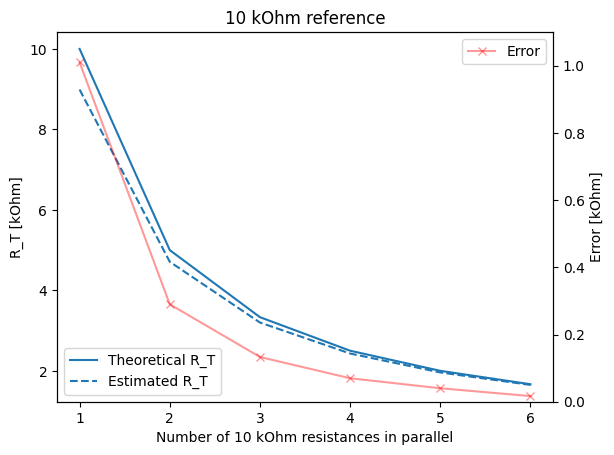

In [22]:
V_adc = [1.412272, 0.9857, 0.75817, 0.6180418, 0.5224292, 0.4523224] #+ [0.266]
R_true = [10/x for x in range(1,len(V_adc)+1)] #+ [10/14]
R_adc = [R_T(x, R_ref=10) for x in V_adc]

fig, ax = plt.subplots(1,1)
ax.plot([x+1 for x in range(len(V_adc))], R_true, color='tab:blue', label="Theoretical R_T")
ax.plot([x+1 for x in range(len(V_adc))], R_adc, color='tab:blue', linestyle='dashed', label="Estimated R_T")
ax.set_xticks([x for x in range(len(V_adc)+1)])
ax.set_xlabel('Number of 10 kOhm resistances in parallel')
ax.set_ylabel('R_T [kOhm]')
ax.legend(loc='lower left')
ax2 = ax.twinx()
ax2.plot([np.nan] + [np.abs((R_true[i]-R_adc[i])) for i in range(len(R_true))], '-x', alpha=0.4, color='red', label="Error")
ax2.set_ylabel('Error [kOhm]')
ax2.set_ylim([0,1.1])
ax2.legend()
plt.title('10 kOhm reference')
plt.plot()

error_10 = [(R_true[i]-R_adc[i]) for i in range(len(R_true))]

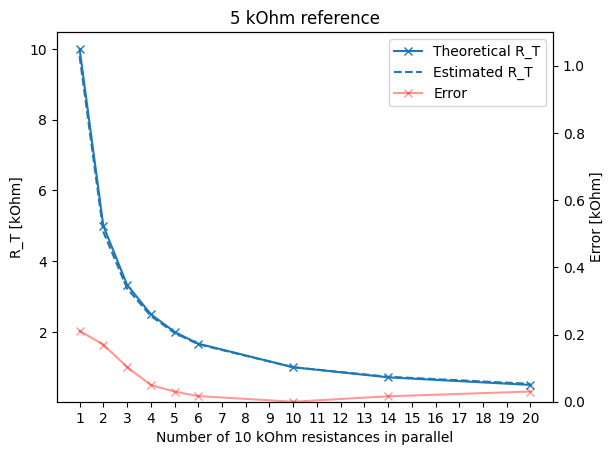

In [23]:
V_adc = [2.033098, 1.536289, 1.241078, 1.047803, 0.9053327, 0.7964492] + [0.5420046, 0.4125865, 0.3112422]
R_true = [10/x for x in range(1,7)] + [10/10, 10/14, 10/20]
R_adc = [R_T(x, R_ref=5) for x in V_adc]

fig, ax = plt.subplots(1,1)
ax.plot([x for x in range(1,7)]+[10,14,20], R_true, '-x', color='tab:blue', label="Theoretical R_T")
ax.plot([x for x in range(1,7)]+[10,14,20], R_adc, color='tab:blue', linestyle='dashed', label="Estimated R_T")
ax.set_xticks([x for x in range(20+1)])
ax.set_xlabel('Number of 10 kOhm resistances in parallel')
ax.set_ylabel('R_T [kOhm]')
ax2 = ax.twinx()
ax2.plot([x for x in range(1,7)]+[10,14,20], [np.abs(R_true[i]-R_adc[i]) for i in range(len(R_true))], '-x', alpha=0.4, color='red', label="Error")
ax2.set_ylabel('Error [kOhm]')
ax2.set_ylim([0,1.1])
plt.title('5 kOhm reference')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2)

plt.plot()

error_5 = [(R_true[i]-R_adc[i]) for i in range(len(R_true))]

In [24]:
# plt.plot(error_10, '-x', alpha=0.5, color='red', label="Error with 10kOhm reference")
# plt.plot(error_5, '-.x', alpha=0.5, color='red', label="Error with 5kOhm reference")
# plt.legend()
# plt.show()

In [25]:
t0 = 298
r0 = 5.5
beta = 3977
import math

def temp(R_T):
    temp_c = 1 / ((1 / t0) + (math.log(R_T / r0) / beta)) - 273
    temp_f = 32 + (temp_c * 9/5)   
    return temp_f

[]

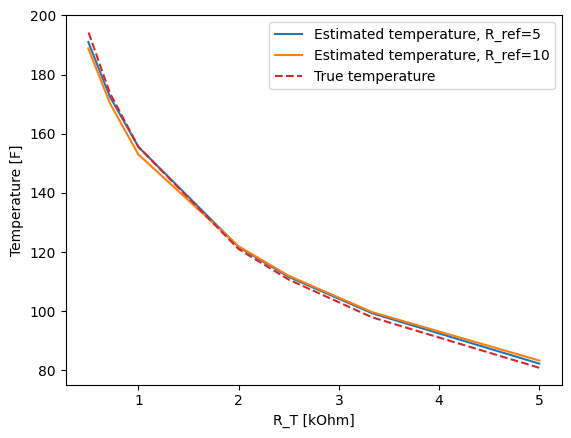

In [26]:
R_true = [10/x for x in range(2,6)] + [10/10, 10/14, 10/20]
temperature_true = [temp(r) for r in R_true]

# 5 kOhm
V_adc_5 = [1.536289, 1.241078, 1.047803, 0.9053327] + [0.5420046, 0.4125865, 0.3112422]
temperature_adc_5 = [temp(R_T(x, R_ref=5)) for x in V_adc_5]

# 10 kOhm
V_adc_10 = [0.9857, 0.75817, 0.6180418, 0.5224292] + [0.3059666, 0.2305463, 0.1706086]
temperature_adc_10 = [temp(R_T(x, R_ref=10)) for x in V_adc_10]

fig, ax = plt.subplots(1,1)
ax.plot(R_true, temperature_adc_5, '-', color='tab:blue', label="Estimated temperature, R_ref=5")
ax.plot(R_true, temperature_adc_10, '-', color='tab:orange', label="Estimated temperature, R_ref=10")
ax.plot(R_true, temperature_true, color='tab:red', label="True temperature", linestyle='dashed')
ax.set_xlabel('R_T [kOhm]')
ax.set_ylabel('Temperature [F]')
ax.legend()
plt.plot()

In [27]:
df = pd.DataFrame({'R_T true [kOhm]': R_true, 
                   'T true [F]': temperature_true,
                   'T (R_ref=10) [F]': temperature_adc_10,
                   'T (R_ref=5) [F]': temperature_adc_5,
                   })

df = round(df,2)
df

,R_T true [kOhm],T true [F],T (R_ref=10) [F],T (R_ref=5) [F]
0,5.00,80.86,83.31,82.27
1,3.33,97.91,99.69,99.28
2,2.50,110.68,111.97,111.60
3,2.00,120.99,121.95,121.71
4,1.00,155.55,152.98,155.55
5,0.71,173.86,170.42,172.60
6,0.50,194.49,188.87,191.00
